# Widget Demonstration

Jupyter tem uma noção de widgets, que nos permite construir dashboards dentro de notebooks para ajudar na nossa análise
https://ipywidgets.readthedocs.io/en/latest/

In [1]:
# Vamos utilizar a função interact como um decorador em Python
from ipywidgets import interact
import ipywidgets as widgets

# Agora vamos importar um dataset
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("../assets/wipeout.csv")
df=df.set_index(pd.to_datetime(df["timestamp"]))
df.head()

,timestamp,cadence,distance,enhanced_altitude,enhanced_speed,fractional_cadence,heart_rate,position_lat,position_long,speed,timestamp.1,position_lat_degrees,position_long_degrees
timestamp,,,,,,,,,,,,,
2019-11-01 20:12:03,2019-11-01 20:12:03,NaN,0.00,281.6,0.000,NaN,84.0,504424439.0,-999065791.0,NaN,2019-11-01 20:12:03,42.280368,-83.740727
2019-11-01 20:12:04,2019-11-01 20:12:04,NaN,0.00,281.6,0.000,NaN,84.0,504424439.0,-999065791.0,NaN,2019-11-01 20:12:04,42.280368,-83.740727
2019-11-01 20:12:07,2019-11-01 20:12:07,NaN,0.00,281.6,0.000,NaN,87.0,504424439.0,-999065791.0,NaN,2019-11-01 20:12:07,42.280368,-83.740727
2019-11-01 20:12:08,2019-11-01 20:12:08,NaN,0.32,281.6,1.036,NaN,88.0,504424447.0,-999065835.0,NaN,2019-11-01 20:12:08,42.280369,-83.740731
2019-11-01 20:12:10,2019-11-01 20:12:10,NaN,3.30,281.8,2.976,NaN,89.0,504424476.0,-999066382.0,NaN,2019-11-01 20:12:10,42.280371,-83.740777


In [ ]:
# Pandas tem algum suporte para plotagem, mas precisa "conversar" com o matplotlib
# Fazemos isso indicando que queremos que os nossos plots do pandas sejam convertidos automaticamente para nós
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


In [10]:
df.columns

Index(['timestamp', 'cadence', 'distance', 'enhanced_altitude',
       'enhanced_speed', 'fractional_cadence', 'heart_rate', 'position_lat',
       'position_long', 'speed', 'timestamp.1', 'position_lat_degrees',
       'position_long_degrees'],
      dtype='object')

In [9]:
# Nem todas as colunas no meu dataframe são boas para visualizar em um gráfico de linha. Então eu vou
# para iterar pelo meu dataframe e apenas manter uma lista das colunas que não são do tipo
# objeto (por exemplo, a coluna é um número)
potential_columns=[]
for col in df.columns:
    if df[col].dtype != "object":
        potential_columns.append(col)
potential_columns


['cadence',
 'distance',
 'enhanced_altitude',
 'enhanced_speed',
 'fractional_cadence',
 'heart_rate',
 'position_lat',
 'position_long',
 'speed',
 'position_lat_degrees',
 'position_long_degrees']

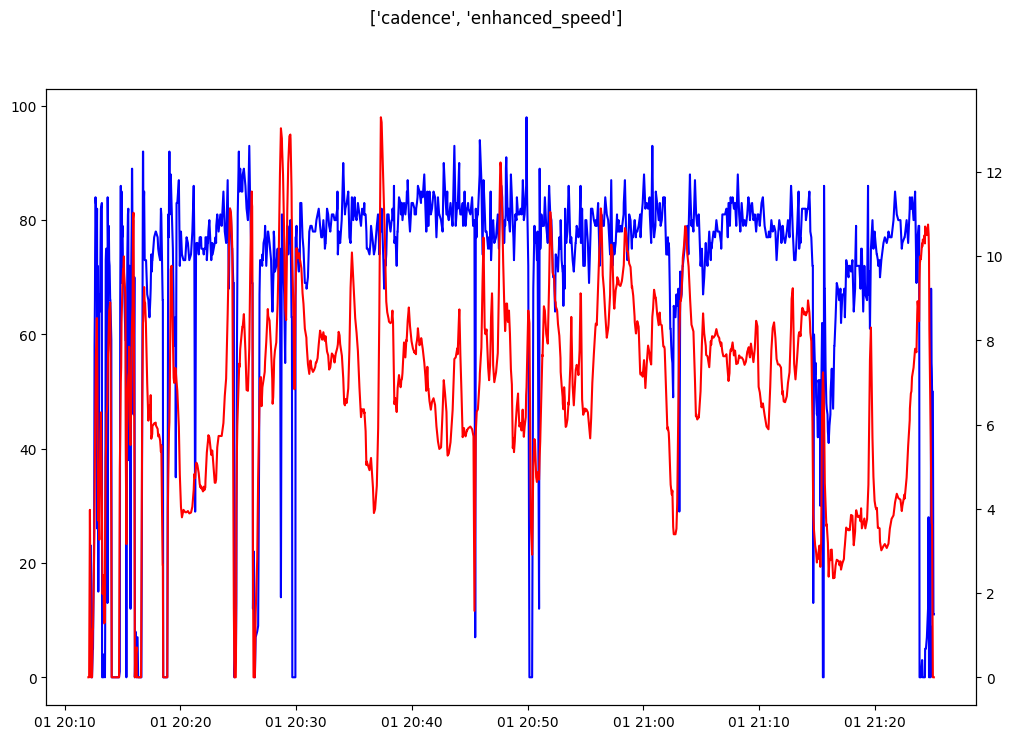

In [12]:
# Ok, agora eu quero escrever uma função plot wrapper. Esta função irá plotar
# uma ou duas colunas, nada mais. Se houver uma única coluna passada, ela será
# plota isso em azul (cor padrão), mas se forem dois vai plotar o
# uma coluna de dados em cima da outra, com a segunda coluna em vermelho. Vamos usar
# a função plt.twinx() aqui para garantir que o eixo x seja o mesmo (vai ser o tempo, o índice do dataframe),
# mas o eixo y pode ser único para cada série de dados.
def plot_data(col_names):
    plt.figure(figsize=[12,8])
    plt.gcf().suptitle(str(col_names))
    if len(col_names) ==2:
        plt.plot(df[list(col_names)[0]],'b')
        ax=plt.twinx()
        ax.plot(df[list(col_names)[1]],'r')
    else:
        plt.plot(df[list(col_names)])
plot_data(["cadence","enhanced_speed"])

In [7]:
# Para tornar isso interativo, podemos "envolver" essa função com o decorador @interact(). 
# Um decorador em python é apenas uma função que envolve outra função, e a equipe do ipython 
# escreveu esta para nós, ela nos permite fornecer um novo widget SelectMultiple 
# e usar o que for selecionado lá como um parâmetro para plot_data. Nós configuramos isso 
# colocando o decorador na frente da definição da função plot_data, então vou fazer
# uma pequena cópia e colagem aqui.

# O widget SelectMultiple tem três parâmetros, o conjunto de opções que são legais
# (portanto, esses serão nossos possíveis nomes de coluna) os valores que queremos passar (e o tempo
# sempre será nosso primeiro valor que queremos passar, seguido por qualquer outros valores
# são selecionados) e alguma string descritiva.
@interact(col_names=widgets.SelectMultiple(
    options=potential_columns,
    value=(potential_columns[0],),
    description='Columns'))
def plot_data(col_names):
    plt.figure(figsize=[12,8])
    plt.gcf().suptitle(str(col_names))
    if len(col_names) ==2:
        plt.plot(df[list(col_names)[0]],'b')
        ax=plt.twinx()
        ax.plot(df[list(col_names)[1]],'r')
    else:
        plt.plot(df[list(col_names)])



interactive(children=(SelectMultiple(description='Columns', index=(0,), options=('cadence', 'distance', 'enhan…

In [8]:
# Vejamos mais um exemplo. Aqui vou usar um widget chamado IntRangeSlider
# que permite ao leitor definir limites inferiores e superiores para algo. Neste caso vou olhar para um gráfico
# da frequência cardíaca, onde o leitor consegue ver todos os lugares entre 80 e 100, mas 
# pode alterar isso para filtrar com base nos valores nos quais está interessado. Também vou
# criar um widget de texto que permite definir o horário de início e término, para que você possa ampliar
# um horário de interesse.
@interact(heart_rate_bounds=widgets.IntRangeSlider(
    value=[80, 100],
    min=0,
    max=180,
    step=1,
    description='HR Range:',
    continuous_update=False,
    readout_format='d',),
    start=widgets.Text(
    value=str(df.index[0]),
    description='Start Time:'),
    end=widgets.Text(
    value=str(df.index[-1]),
    description='End Time:'))

def plot_hr(heart_rate_bounds, start, end):
    plt.figure(figsize=[12,8])
    
    plt.xlim(left=df.index[0],right=df.index[-1])
    plt.ylim(0,max(df["heart_rate"]))
    
    ndf=df[(df["heart_rate"]>heart_rate_bounds[0]) & 
           (df["heart_rate"]<heart_rate_bounds[1]) & 
           (df.index>start) & (df.index<end)]
    plt.scatter(ndf.index,ndf["heart_rate"])

interactive(children=(IntRangeSlider(value=(80, 100), continuous_update=False, description='HR Range:', max=18…